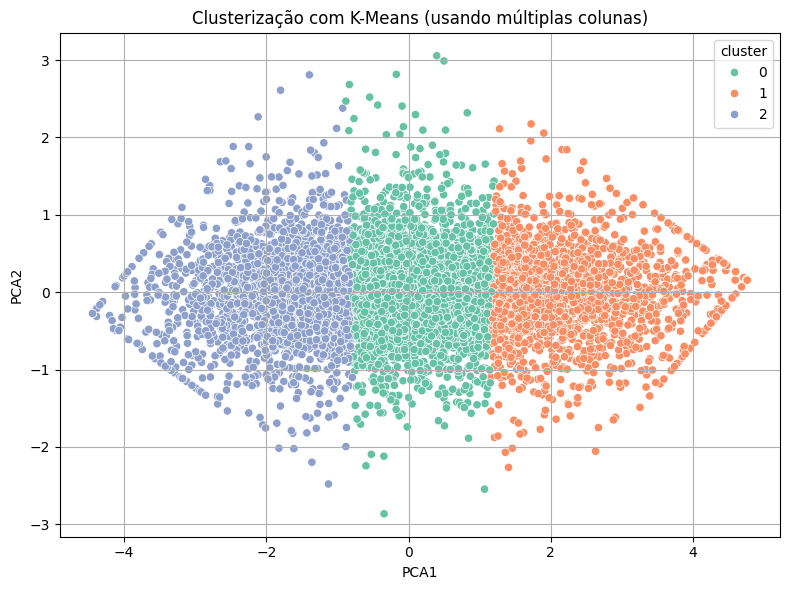

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_excel('conceito_enade_2021.xlsx')

# Selecionar colunas para a nova clusterização
colunas_cluster = [
    'Nota Padronizada - FG',
    'Nota Padronizada - CE',
    'Conceito Enade (Contínuo)'
]

# Filtrar e remover valores ausentes
df_cluster = df[colunas_cluster].dropna()

# Padronizar os dados
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(df_cluster)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(dados_padronizados)

# Reduzir para 2D com PCA para visualização
pca = PCA(n_components=2)
dados_2d = pca.fit_transform(dados_padronizados)

# Criar DataFrame para visualização
df_plot = pd.DataFrame(dados_2d, columns=['PCA1', 'PCA2'])
df_plot['cluster'] = clusters

# Plotar gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PCA1', y='PCA2', hue='cluster', palette='Set2')
plt.title('Clusterização com K-Means (usando múltiplas colunas)')
plt.grid(True)
plt.tight_layout()
plt.show()
